In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

%matplotlib inline

def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

def plot_sir_curves(title, N, I0, R0, beta, gamma):
    R_0 = beta / gamma
    
    t = np.linspace(0, 365 * 2, 1000)


    y0 = S0, I0, R0

    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T

    fig = plt.figure(facecolor='w', figsize=(20, 10))

    ax = fig.add_subplot(111) #, axisbelow=True)
    ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptibles')
    ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
    ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Removidos')
    ax.set_xlabel('Tiempo en dias')
    ax.set_ylabel('Numero')
    ax.set_ylim(0, N * 1.1)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

    legend = ax.legend()
    legend.get_frame().set_alpha(1.0)

    ax.minorticks_on()
    ax.grid(b=True, axis='y', which='minor', linestyle=':')
    ax.grid(b=True, axis='y', which='major', lw=2, ls='-')
    ax.grid(b=True, axis='x', which='major', lw=2, ls='-', alpha=0.5)

    plt.title("{:}\n(R_0: {:.3f}, beta: {:.3f})".format(title, R_0, beta))
    plt.show()

## Escenario Pesimista

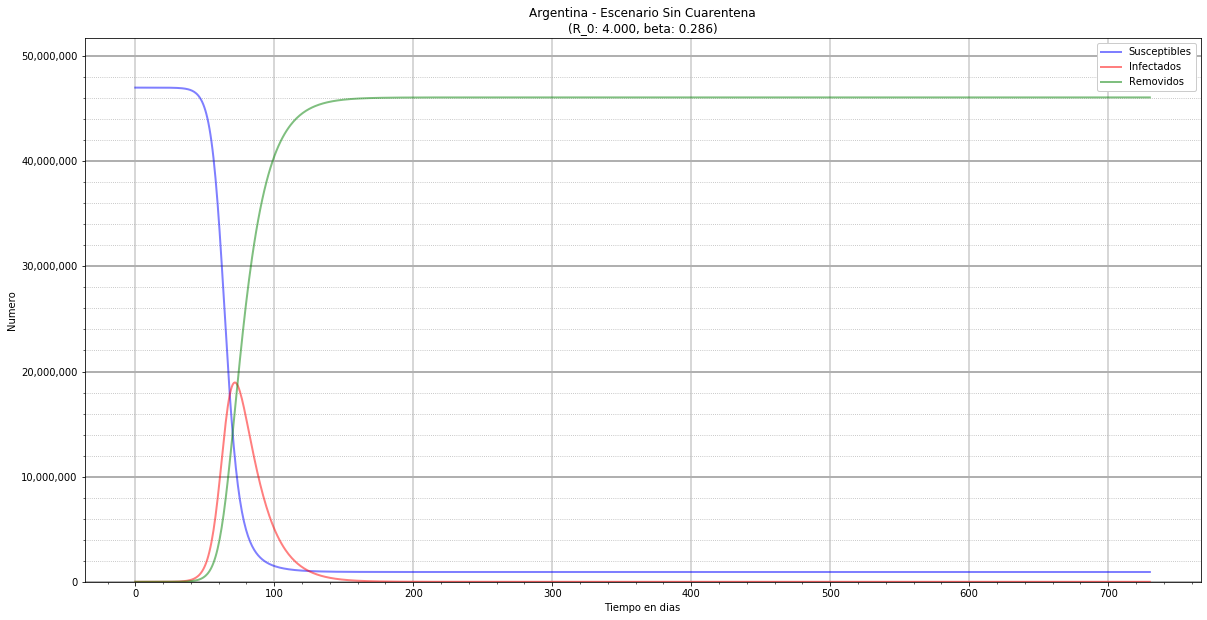

In [3]:
N = 47000000

I0, R0 = 35, 0


S0 = N - I0 - R0

gamma = 1./14

R_0 = 4
beta = R_0 * gamma

plot_sir_curves("Argentina - Escenario Sin Cuarentena", N, I0, R0, beta, gamma)

## Escenario Optimista

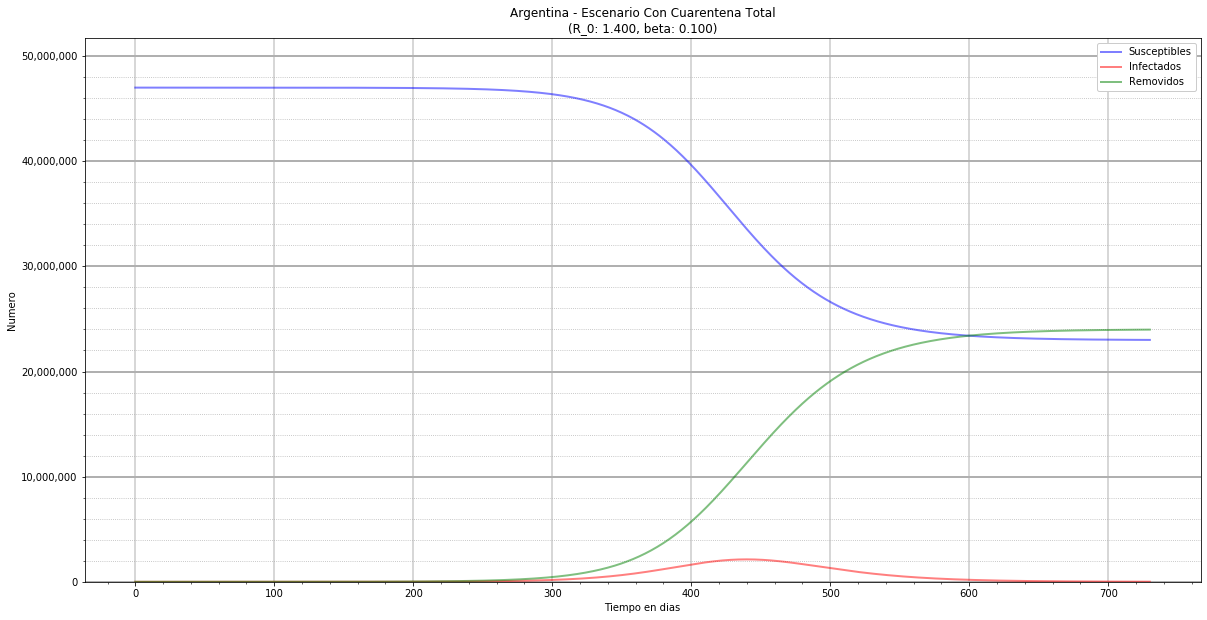

In [4]:
N = 47000000

I0, R0 = 35, 0

S0 = N - I0 - R0

gamma = 1./14

R_0 = 1.4
beta = R_0 * gamma

plot_sir_curves("Argentina - Escenario Con Cuarentena Total", N, I0, R0, beta, gamma)